# Cats vs Dogs Classification

We start our project by connecting the google drive to the google colab. This way we can use our dataset without using the local.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#SETUP

Installing the required packages

In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.0 MB/s eta 0:00:00


Here, we are importing the tensorflow framework and os module for path and file structure related use cases.

In [3]:
import tensorflow as tf
import os

This line prevents tensorflow from using all of our vram prevents us from getting the Out of Memory type of errors.

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
  
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#LOAD DATA

Importing dependencies.

In [5]:
import numpy as np
from matplotlib import pyplot as plt

  We load our data via theese built-in keras functions, here, we define the train, test and the whole data by giving the corresponding paths for them. Also these functions have some built-in prepocessing properties, such as resizing shuffling, labeling etc...
  **This function also makes batches with the size of 32 as built-in feature.**

In [14]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/data')
train_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/data/training_set')
test_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/data/test_set')

Found 2000 files belonging to 2 classes.
Found 1600 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


We convert our data generators to data iterators.

In [15]:
data_iterator = data.as_numpy_iterator()
test_data_iterator = test_data.as_numpy_iterator()
train_data_iterator = test_data.as_numpy_iterator()

Getting the next iteration from our iterator, this way we can get our batch.

In [8]:
batch = data_iterator.next()

Showing the pictures from the batches.

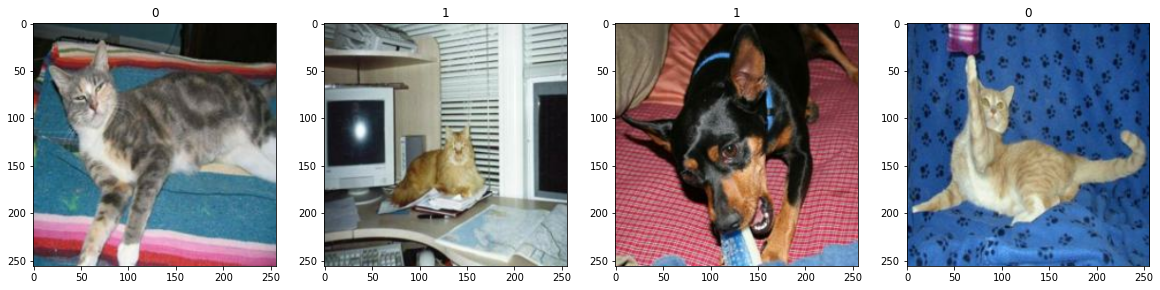

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# SCALE THE DATA

Here, we map our pixel values to a scale between 0 and 1. We are dividing to 255 because it is the maximum value for a pixel.

In [10]:
data = data.map(lambda x,y: (x/255, y))

Here we can see that the batch has scaled.

In [11]:
data.as_numpy_iterator().next()

(array([[[[0.74509805, 0.72156864, 0.7294118 ],
          [0.7387255 , 0.7151961 , 0.7230392 ],
          [0.7291667 , 0.7056373 , 0.7134804 ],
          ...,
          [0.61764705, 0.6019608 , 0.56666666],
          [0.6340686 , 0.61838233, 0.5830882 ],
          [0.6117647 , 0.59607846, 0.56078434]],
 
         [[0.7610294 , 0.7375    , 0.74534315],
          [0.75465685, 0.73112744, 0.7389706 ],
          [0.7516697 , 0.7281403 , 0.73598343],
          ...,
          [0.6347733 , 0.619087  , 0.58379287],
          [0.64741117, 0.6317249 , 0.5964308 ],
          [0.6276961 , 0.6120098 , 0.5767157 ]],
 
         [[0.74583334, 0.7223039 , 0.73014706],
          [0.7460325 , 0.72250307, 0.7303462 ],
          [0.74793196, 0.72440255, 0.7322457 ],
          ...,
          [0.6326593 , 0.61697304, 0.5816789 ],
          [0.6380208 , 0.62233454, 0.5870404 ],
          [0.62328434, 0.60759807, 0.57230395]],
 
         ...,
 
         [[0.720098  , 0.6887255 , 0.68088233],
          [0.73802

#SET THE VALIDATION AND TEST



In this section we specify our train, test and validation sets. Since train and test sets already given in the assignment, i only used %20 percent of the training set for the validation and leave the test set as same.

In [23]:
len(train_data), len(test_data)

(50, 13)

In [16]:
test_data_iterator = test_data.as_numpy_iterator().next()
train_data_iterator = test_data.as_numpy_iterator().next()

In [18]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)

In [20]:
train_size + val_size

50

In [25]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data

Here, you can see the number of batches each set contains. And each batch contain 32 samples.

In [27]:
len(train), len(val), len(test)

(40, 10, 13)

# MODEL 1

Importing the Sequential API and necessary kinds of layer which will be used in model structure.

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization

Defining the model.

In [117]:
model1 = Sequential()

# 1'st convolutional layer
model1.add(Conv2D(16, (3,3), 1, activation='relu', padding = 'same', input_shape=(256,256,3))) # Shape (None, 256, 256, 16)
# Max pooling only chooses the features with highest value among regions. The default is 2x2, therefore the size decreased by half
model1.add(MaxPooling2D()) #Shape (None, 128, 128, 16)
# 2'nd convolutional layer
model1.add(Conv2D(32, (3,3), 1, activation='relu', padding = 'same')) # Shape (None, 128, 128, 32)
# Normalization among batches
model1.add(BatchNormalization()) # Shape (None, 128, 128, 32)
model1.add(MaxPooling2D()) # Shape (None, 64, 64, 32)
# Flattens the tensor
model1.add(Flatten()) # Shape (None, 64*64*32)
# 1'st fully connected layer
model1.add(Dense(256, activation='relu')) # Shape (None, 256)
model1.add(Dropout(0.2)) # Shape (None, 256)
# 2'nd fully connected layer
model1.add(Dense(1, activation='sigmoid')) # Shape (None, 1)

Compiling the model

In [118]:
model1.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [119]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                      

####TRAIN

Callbacks are useful if you need to make a checkpoint or callbacks

In [120]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Train the model for 20 epochs and use the validation set

In [121]:
hist = model1.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
40/40 [==============================] - 9s 203ms/step - loss: 9.4896 - accuracy: 0.5344 - val_loss: 3.4936 - val_accuracy: 0.5375
Epoch 2/20
40/40 [==============================] - 7s 165ms/step - loss: 0.6605 - accuracy: 0.5852 - val_loss: 2.4348 - val_accuracy: 0.4688
Epoch 3/20
40/40 [==============================] - 7s 166ms/step - loss: 0.5988 - accuracy: 0.6383 - val_loss: 2.2090 - val_accuracy: 0.5219
Epoch 4/20
40/40 [==============================] - 7s 164ms/step - loss: 0.5231 - accuracy: 0.7047 - val_loss: 1.2679 - val_accuracy: 0.5844
Epoch 5/20
40/40 [==============================] - 7s 165ms/step - loss: 0.4222 - accuracy: 0.7742 - val_loss: 1.3395 - val_accuracy: 0.5469
Epoch 6/20
40/40 [==============================] - 7s 167ms/step - loss: 0.3318 - accuracy: 0.8359 - val_loss: 0.9964 - val_accuracy: 0.6469
Epoch 7/20
40/40 [==============================] - 7s 167ms/step - loss: 0.2578 - accuracy: 0.8992 - val_loss: 0.9168 - val_accuracy: 0.6562
Epoch 

#### PLOT

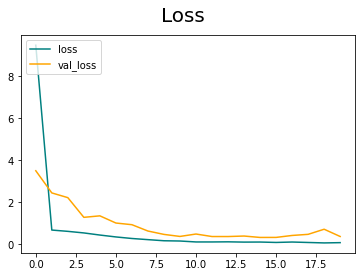

In [122]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### It can be seen that loss hes been decreased and the accuracy increased rapidly, since both training loss and validation loss decrease together and accuracy increase together, it is good news

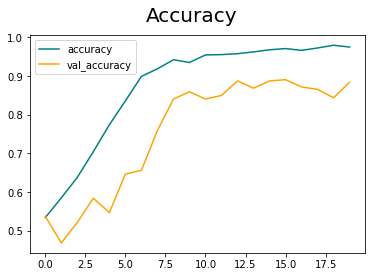

In [123]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### EVALUATE

In [2]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

Precicion and Recall are useful metrics that tell us information if there is inbalance in the classes in the data. In this dataset there is not such a problem but it's still nice to see these numbers

In [3]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

Updating the metrics according to the batch results

In [126]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model1.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 219ms/step


Final metrics

In [127]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.56696427, shape=(), dtype=float32) tf.Tensor(0.635, shape=(), dtype=float32) tf.Tensor(0.575, shape=(), dtype=float32)


#### TEST

Now, lets check if our dataset has been classifying correctly

In [128]:
import cv2

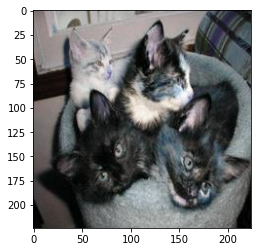

In [129]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/test_set/cats/cat.4837.jpg')
plt.imshow(img)
plt.show()

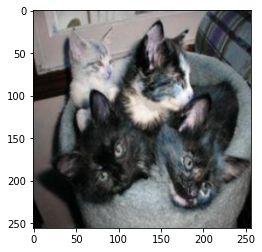

In [130]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [131]:
yhat = model1.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 85ms/step


array([[9.726556e-31]], dtype=float32)

In [132]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat


# MODEL 2

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [136]:
model2 = Sequential()

model2.add(Conv2D(16, (3,3), 1, activation='sigmoid', padding = 'same', input_shape=(256,256,3))) #Shape (None, 256, 256, 16)
model2.add(MaxPooling2D()) #Shape (None, 128, 128, 16)
model2.add(Conv2D(32, (3,3), 1, activation='sigmoid', padding = 'same')) #Shape (None, 128, 128, 32)
model2.add(MaxPooling2D()) #Shape (None, 64, 64, 32)
model2.add(Conv2D(32, (3,3), 1, activation='sigmoid', padding = 'same')) #Shape (None, 64, 64, 32)
model2.add(MaxPooling2D()) #Shape (None, 32, 32, 32)
model2.add(Conv2D(32, (3,3), 1, activation='sigmoid', padding = 'same')) #Shape (None, 32, 32, 32)
model2.add(BatchNormalization()) #Shape (None, 32, 32, 32)
model2.add(MaxPooling2D()) #Shape (None, 16, 16, 32)
model2.add(Conv2D(16, (3,3), 1, activation='sigmoid', padding = 'same')) #Shape (None, 16, 16, 16)
model2.add(BatchNormalization()) #Shape (None, 16, 16, 16)
model2.add(MaxPooling2D()) #Shape (None, 8, 8, 16)
model2.add(Flatten()) #Shape (None, 8*8*16)
model2.add(Dropout(0.2)) #Shape (None, 8*8*16)
model2.add(Dense(256, activation='sigmoid')) #Shape (None, 256)
model2.add(Dense(1, activation='sigmoid')) #Shape (None, 1)

In [137]:
model2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [138]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 32)      

####TRAIN

Lets train the model to see the difference

In [140]:
hist = model2.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
40/40 [==============================] - 8s 167ms/step - loss: 0.7582 - accuracy: 0.5055 - val_loss: 1.0647 - val_accuracy: 0.4656
Epoch 2/20
40/40 [==============================] - 7s 164ms/step - loss: 0.6748 - accuracy: 0.5906 - val_loss: 1.3584 - val_accuracy: 0.4844
Epoch 3/20
40/40 [==============================] - 8s 197ms/step - loss: 0.6507 - accuracy: 0.6203 - val_loss: 1.5545 - val_accuracy: 0.4750
Epoch 4/20
40/40 [==============================] - 7s 166ms/step - loss: 0.6165 - accuracy: 0.6484 - val_loss: 1.1132 - val_accuracy: 0.5031
Epoch 5/20
40/40 [==============================] - 7s 167ms/step - loss: 0.6041 - accuracy: 0.6703 - val_loss: 1.2233 - val_accuracy: 0.4563
Epoch 6/20
40/40 [==============================] - 7s 170ms/step - loss: 0.5762 - accuracy: 0.6820 - val_loss: 1.1662 - val_accuracy: 0.5094
Epoch 7/20
40/40 [==============================] - 7s 168ms/step - loss: 0.5696 - accuracy: 0.6898 - val_loss: 1.3006 - val_accuracy: 0.4875
Epoch 

#### PLOT

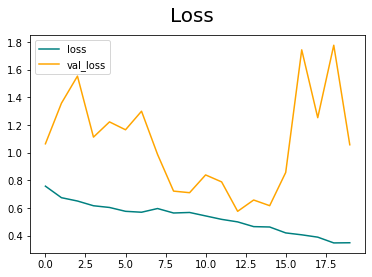

In [141]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Even though loss is decreasing, the validation loss doesn't, this means either there is a problem with uses of functions or a overfitting situation. We know that sigmoids are usually better for binary classification, but we use them everywhere in this model. Now we see that why we shouldn't use sigmoid in hidden layers.

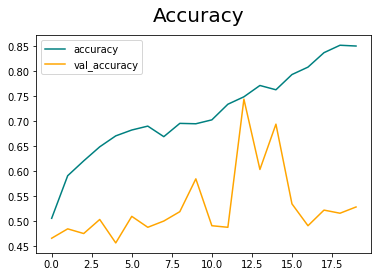

In [142]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### EVALUATE

In [145]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model2.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 290ms/step


Precision and recall values are normal, even though we used sigmoid literally everwhere.

In [146]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.5147453, shape=(), dtype=float32) tf.Tensor(0.96, shape=(), dtype=float32) tf.Tensor(0.5275, shape=(), dtype=float32)


#### TEST

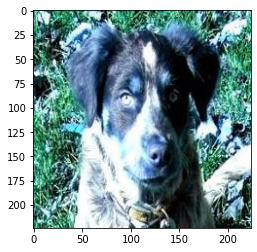

In [148]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/test_set/dogs/dog.4843.jpg')
plt.imshow(img)
plt.show()

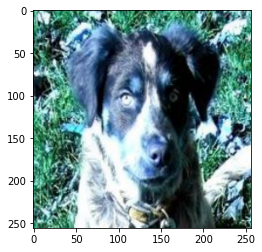

In [149]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [150]:
yhat = model2.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 145ms/step


array([[0.00640522]], dtype=float32)

In [151]:
if yhat > 0.5: 
    print(f'Predicted class is Cat')
else:
    print(f'Predicted class is Dog')

Predicted class is Dog


# MODEL 3

In this model i didn't use the same padding just to see how the shapes change.

In [155]:
model3 = Sequential()

model3.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #Shape (None, 254, 254, 16)
model3.add(MaxPooling2D()) #Shape (None, 127, 127, 16)
model3.add(Conv2D(32, (3,3), 1, activation='relu')) #Shape (None, 125, 125, 32)
model3.add(MaxPooling2D()) #Shape (None, 62, 62, 32)
model3.add(Conv2D(32, (3,3), 1, activation='relu')) #Shape (None, 60, 60, 32)
model3.add(BatchNormalization()) #Shape (None, 60, 60, 32)
model3.add(MaxPooling2D()) #Shape (None, 30, 30, 32)
model3.add(Conv2D(32, (3,3), 1, activation='relu')) #Shape (None, 28, 28, 32)
model3.add(BatchNormalization()) #Shape (None, 28, 28, 32)
model3.add(MaxPooling2D()) #Shape (None, 14, 14, 32)
model3.add(Conv2D(16, (3,3), 1, activation='relu')) #Shape (None, 12, 12, 16)
model3.add(MaxPooling2D()) #Shape (None, 6, 6, 16)
model3.add(Flatten()) #Shape (None, 576)
model3.add(Dropout(0.2)) #Shape (None, 576)
model3.add(Dense(256, activation='relu')) #Shape (None, 256)
model3.add(Dense(1, activation='sigmoid')) #Shape (None, 1)

In [156]:
model3.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [157]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_3 (Batc  (None, 60, 60, 32)      

####TRAIN

Let's train this model to compare the previous model. This time any activation functions can be used and not only sigmoid 

In [159]:
hist = model3.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
40/40 [==============================] - 9s 190ms/step - loss: 0.7700 - accuracy: 0.5781 - val_loss: 0.7835 - val_accuracy: 0.5094
Epoch 2/20
40/40 [==============================] - 8s 190ms/step - loss: 0.6459 - accuracy: 0.6352 - val_loss: 0.6855 - val_accuracy: 0.5344
Epoch 3/20
40/40 [==============================] - 7s 166ms/step - loss: 0.5957 - accuracy: 0.6727 - val_loss: 0.6279 - val_accuracy: 0.6281
Epoch 4/20
40/40 [==============================] - 7s 161ms/step - loss: 0.6154 - accuracy: 0.6648 - val_loss: 0.6411 - val_accuracy: 0.6250
Epoch 5/20
40/40 [==============================] - 7s 162ms/step - loss: 0.5468 - accuracy: 0.7180 - val_loss: 0.8271 - val_accuracy: 0.5531
Epoch 6/20
40/40 [==============================] - 7s 165ms/step - loss: 0.5126 - accuracy: 0.7375 - val_loss: 0.5734 - val_accuracy: 0.6969
Epoch 7/20
40/40 [==============================] - 9s 212ms/step - loss: 0.4714 - accuracy: 0.7789 - val_loss: 0.5196 - val_accuracy: 0.7344
Epoch 

#### PLOT

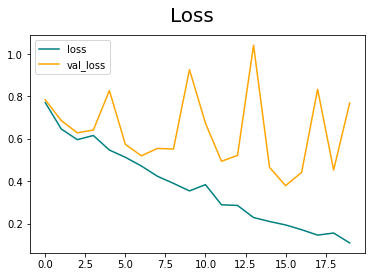

In [160]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Its interesting that even though i was able to use any activation function, still its not a satisfactory result. Yes, the training loss decrases but the validation loss is freaquenly going up and down and this is most probably because of overfitting and its not converging.

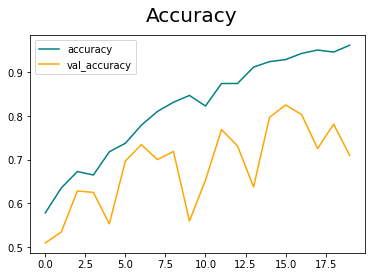

In [161]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### EVALUATE

In [164]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model3.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 307ms/step


Here we can see that precision is high and recall is lower. This is means that we are precise in our predictions but not very accurate.

In [165]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.85507244, shape=(), dtype=float32) tf.Tensor(0.295, shape=(), dtype=float32) tf.Tensor(0.6225, shape=(), dtype=float32)


#### TEST

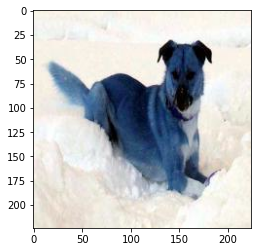

In [167]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/test_set/dogs/dog.4819.jpg')
plt.imshow(img)
plt.show()

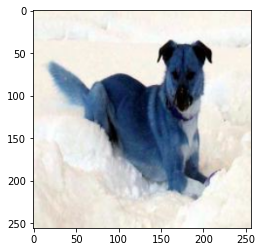

In [168]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [169]:
yhat = model3.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 118ms/step


array([[0.2215632]], dtype=float32)

In [170]:
if yhat > 0.5: 
    print(f'Predicted class is Cat')
else:
    print(f'Predicted class is Dog')

Predicted class is Dog


#MODEL 4

In [171]:
"""
ResNet-18
Reference:
[1] K. He et al. Deep Residual Learning for Image Recognition. CVPR, 2016
[2] K. He, X. Zhang, S. Ren, and J. Sun. Delving deep into rectifiers:
Surpassing human-level performance on imagenet classification. In
ICCV, 2015.
"""


from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf


class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [174]:
model4 = ResNet18(1)
model4.build(input_shape = (None,256,256,3))
#use categorical_crossentropy since the label is one-hot encoded
from keras.optimizers import SGD
# opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) #parameters suggested by He [1]
model4.compile(optimizer = "adam",loss='binary_crossentropy', metrics=["accuracy"]) 
model4.summary()

Model: "res_net18_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          multiple                  9472      
                                                                 
 batch_normalization_45 (Bat  multiple                 256       
 chNormalization)                                                
                                                                 
 max_pooling2d_26 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 resnet_block_16 (ResnetBloc  multiple                 74368     
 k)                                                              
                                                                 
 resnet_block_17 (ResnetBloc  multiple                 74368     
 k)                                                    

In [178]:
hist = model4.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
40/40 [==============================] - 14s 239ms/step - loss: 0.8679 - accuracy: 0.5063 - val_loss: 913.0148 - val_accuracy: 0.4844
Epoch 2/20
40/40 [==============================] - 9s 227ms/step - loss: 0.6708 - accuracy: 0.5008 - val_loss: 211.9974 - val_accuracy: 0.4875
Epoch 3/20
40/40 [==============================] - 10s 228ms/step - loss: 0.6419 - accuracy: 0.5039 - val_loss: 10.4717 - val_accuracy: 0.5031
Epoch 4/20
40/40 [==============================] - 10s 228ms/step - loss: 0.6232 - accuracy: 0.5078 - val_loss: 2.4316 - val_accuracy: 0.4781
Epoch 5/20
40/40 [==============================] - 10s 229ms/step - loss: 0.6146 - accuracy: 0.5039 - val_loss: 1.0678 - val_accuracy: 0.4719
Epoch 6/20
40/40 [==============================] - 10s 229ms/step - loss: 0.6056 - accuracy: 0.5000 - val_loss: 0.8128 - val_accuracy: 0.4812
Epoch 7/20
40/40 [==============================] - 10s 229ms/step - loss: 0.5901 - accuracy: 0.5117 - val_loss: 0.6638 - val_accuracy: 0.

#### PLOT

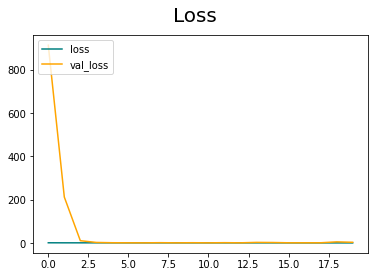

In [179]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

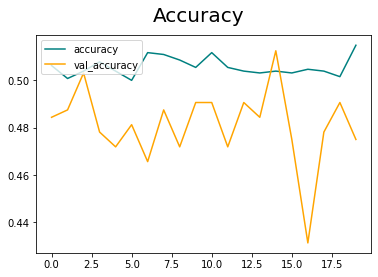

In [180]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### EVALUATE

In [183]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model3.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 25ms/step


In [184]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.85507244, shape=(), dtype=float32) tf.Tensor(0.295, shape=(), dtype=float32) tf.Tensor(0.6225, shape=(), dtype=float32)


#### TEST

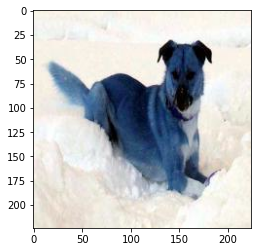

In [186]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/test_set/dogs/dog.4819.jpg')
plt.imshow(img)
plt.show()

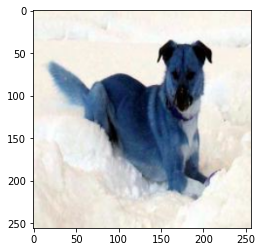

In [187]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [188]:
yhat = model3.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 19ms/step


array([[0.2215632]], dtype=float32)

In [189]:
if yhat > 0.5: 
    print(f'Predicted class is Cat')
else:
    print(f'Predicted class is Dog')

Predicted class is Dog
